In [3]:
from __future__ import division
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import csv

wordlist = []
with open('/content/drive/MyDrive/Colab Notebooks/system/wordlist2020.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        row = [x for x in row if x !='']
        wordlist.append(row)

In [4]:
numcity = 26
paths = [i for i in range(numcity)]

def count(best_path_int):
    count = 0
    for i in range(len(wordlist)):
        index = []
        for j in range(len(wordlist[i])):
            element = wordlist[i][j]
            index.append(best_path_int.index(int(element)))
        k = np.diff(index)
        if min(k)>=0:
            count += 1
    return 1000/count

'''
random path and calculate distance to sreach for optimal initiate temperature
'''
num1 = 0
num2 = 0
dif=0
for i in range(5):
    newPaths1=list(np.random.permutation(paths))
    newPaths2=list(np.random.permutation(paths))
    num1 = count(newPaths1)
    num2 = count(newPaths2)
    difNew=abs(num1-num2)
    if difNew>=dif:
        dif=difNew
    print(1000/num1,1000/num2)
    print(dif)

820.9999999999999 879.9999999999999
0.0816631602258886
807.0 894.0
0.12058914032417678
505.0 634.0
0.40291095355592343
705.0 777.0
0.40291095355592343
804.0000000000001 968.0000000000001
0.40291095355592343


In [5]:
Pr = 0.5 #initiate accept possibility
T0 = dif/Pr#initiate terperature
T = T0
Tmin = T/2
k = 10*len(paths) #times of internal circulation
initialPath = paths.copy()
num = count(initialPath)
initialPath = list(np.random.permutation(paths))
optimalPath = initialPath.copy()
optimalNum = count(initialPath)

import time
time1 = time.time()
t = 0
number = []
path = []
while T>Tmin:
    for i in range(k):
        print (int(1000/optimalNum), optimalPath[:26])
        number.append(int(1000/count(optimalPath[:26])))
        path.append(optimalPath[:26])
        newPaths = optimalPath.copy()
        for j in range(int(T0*10)):
            a = 0
            b = 0
            while a == b:
                a = np.random.randint(0,len(paths))
                b = np.random.randint(0,len(paths))
            te = newPaths[a]
            newPaths[a] = newPaths[b]
            newPaths[b] = te
        newNum = count(newPaths)
        if newNum < optimalNum:
            optimalNum = newNum
            optimalPath = newPaths
        else:
            #metropolis principle
            p = math.exp(-(newNum-optimalNum)/T)
            r = np.random.uniform(low=0,high=1)
            if r < p:
                optimalNum = newNum
                optimalPath = newPaths
 
    back = np.random.uniform(low=0,high=1)
    if back >= 0.85:
        T = T*2
        continue
    t += 1
    T = T0/(1+t)
time2 = time.time()
print("Finished in", time2-time1)

622 [16, 15, 24, 2, 17, 11, 13, 23, 4, 18, 12, 21, 19, 14, 20, 25, 0, 10, 6, 7, 22, 8, 9, 3, 5, 1]
562 [2, 9, 24, 16, 17, 3, 13, 23, 4, 18, 12, 21, 1, 14, 19, 25, 0, 10, 6, 7, 22, 11, 15, 8, 5, 20]
650 [16, 4, 7, 2, 17, 14, 13, 20, 9, 18, 12, 21, 1, 3, 19, 23, 0, 11, 6, 24, 22, 8, 15, 10, 5, 25]
770 [10, 4, 7, 12, 17, 3, 20, 18, 9, 13, 2, 16, 1, 14, 25, 23, 0, 11, 6, 19, 22, 8, 15, 21, 5, 24]
770 [10, 4, 7, 12, 17, 3, 20, 18, 9, 13, 2, 16, 1, 14, 25, 23, 0, 11, 6, 19, 22, 8, 15, 21, 5, 24]
691 [5, 4, 7, 2, 0, 12, 20, 3, 9, 24, 11, 16, 13, 14, 25, 23, 17, 18, 6, 19, 22, 8, 15, 21, 10, 1]
909 [25, 15, 11, 2, 3, 12, 4, 0, 9, 24, 14, 16, 13, 7, 5, 23, 17, 20, 6, 19, 22, 18, 8, 21, 10, 1]
847 [25, 8, 1, 2, 3, 12, 4, 19, 9, 6, 14, 17, 0, 13, 18, 23, 16, 20, 24, 7, 22, 5, 15, 21, 10, 11]
1072 [25, 10, 19, 14, 11, 12, 8, 1, 9, 6, 5, 17, 0, 13, 20, 2, 16, 18, 24, 7, 22, 23, 15, 21, 4, 3]
673 [6, 10, 19, 14, 11, 23, 25, 1, 7, 8, 5, 17, 3, 13, 20, 2, 22, 18, 24, 9, 12, 16, 15, 21, 0, 4]
664 [6, 2

[622, 562, 650, 770, 770, 691, 909, 847, 1072, 673, 664, 664, 664, 813, 963, 743, 991, 786, 1338, 922, 562, 508, 618, 651, 1003, 1003, 790, 832, 936, 765, 994, 994, 1277, 1034, 931, 948, 565, 840, 805, 854, 754, 708, 820, 743, 743, 567, 558, 707, 707, 707, 782, 782, 782, 857, 793, 729, 771, 986, 866, 655, 762, 741, 683, 648, 910, 910, 657, 487, 921, 609, 644, 861, 1294, 921, 779, 684, 799, 533, 672, 718, 539, 519, 537, 489, 423, 621, 621, 720, 718, 729, 967, 665, 624, 774, 849, 804, 746, 746, 646, 593, 689, 623, 654, 470, 625, 728, 728, 707, 707, 799, 721, 649, 1015, 648, 1142, 596, 706, 855, 936, 883, 855, 848, 777, 707, 561, 503, 695, 695, 963, 833, 833, 957, 989, 963, 1001, 1001, 750, 750, 737, 762, 744, 710, 764, 617, 680, 670, 670, 641, 594, 594, 556, 684, 1078, 1078, 748, 566, 566, 621, 914, 757, 685, 764, 650, 650, 517, 606, 692, 690, 708, 514, 1094, 1094, 1150, 791, 791, 769, 734, 745, 808, 639, 670, 670, 766, 836, 1152, 1152, 1226, 710, 651, 924, 1017, 522, 778, 426, 622, 1049

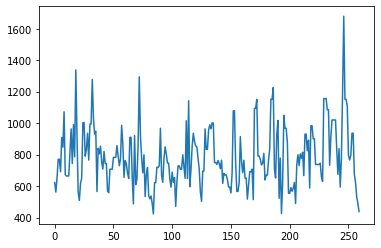

1679 [6, 19, 10, 2, 22, 20, 7, 21, 17, 0, 8, 23, 14, 4, 16, 11, 12, 1, 9, 24, 15, 13, 25, 5, 3, 18]


In [6]:
import matplotlib.pyplot as plt
print(number)
plt.plot(number)
plt.show()
index = number.index(max(number))
print(number[index], path[index])